In [1]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [4]:
# Now we load the TF bhsa database
OT = use('bhsa', hoist=globals())

This is Text-Fabric 9.0.4
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

127 features found and 0 ignored


# 1 Kings 17
## v1 - the Oath langauge

1 Kings 17:1 (BHS SESB 2.0)
1 וַיֹּאמֶר֩ אֵלִיָּ֨הוּ הַתִּשְׁבִּ֜י מִתֹּשָׁבֵ֣י גִלְעָד֮ אֶל־אַחְאָב֒ חַי־יְהוָ֞ה אֱלֹהֵ֤י יִשְׂרָאֵל֙ אֲשֶׁ֣ר עָמַ֣דְתִּי לְפָנָ֔יו אִם־יִהְיֶ֛ה הַשָּׁנִ֥ים הָאֵ֖לֶּה טַ֣ל וּמָטָ֑ר כִּ֖י אִם־לְפִ֥י דְבָרִֽי׃ ס


As the query below shows, the specific oath formula in v1 (חַי + proper name + אִם condition) can mostly be found in Samuel and Kings.

In [53]:
Oath='''
verse
    c1:clause
        w1:word lex=XJ/
        w2:word sp=nmpr
    c2:clause
        =: word lex=>M

c1 < c2
w1 <: w2


'''
Oath=OT.search(Oath)
OT.table(Oath, end=40, colorMap={2:'cyan', 5:'magenta'})

  1.33s 16 results


n,p,verse,clause,word,word,clause,word
1,1_Samuel 14:45,,חַי־יְהוָה֙,חַי־,יְהוָה֙,אִם־יִפֹּ֞ל מִשַּׂעֲרַ֤ת רֹאשֹׁו֙ אַ֔רְצָה,אִם־
2,1_Samuel 19:6,,חַי־יְהוָ֖ה,חַי־,יְהוָ֖ה,אִם־יוּמָֽת׃,אִם־
3,1_Samuel 28:10,,חַי־יְהוָ֕ה,חַי־,יְהוָ֕ה,אִֽם־יִקְּרֵ֥ךְ עָוֹ֖ן בַּדָּבָ֥ר הַזֶּֽה׃,אִֽם־
4,2_Samuel 14:11,,חַי־יְהוָ֔ה,חַי־,יְהוָ֔ה,אִם־יִפֹּ֛ל מִשַּׂעֲרַ֥ת בְּנֵ֖ךְ אָֽרְצָה׃,אִם־
5,2_Samuel 15:21,,חַי־יְהוָ֗ה,חַי־,יְהוָ֗ה,אִם־לְמָ֨וֶת֙,אִם־
6,2_Samuel 15:21,,חַי־יְהוָ֗ה,חַי־,יְהוָ֗ה,אִם־לְחַיִּ֔ים,אִם־
7,1_Kings 17:1,,חַי־יְהוָ֞ה אֱלֹהֵ֤י יִשְׂרָאֵל֙,חַי־,יְהוָ֞ה,אִם־יִהְיֶ֛ה הַשָּׁנִ֥ים הָאֵ֖לֶּה טַ֣ל וּמָטָ֑ר,אִם־
8,1_Kings 17:12,,חַי־יְהוָ֤ה אֱלֹהֶ֨יךָ֙,חַי־,יְהוָ֤ה,אִם־יֶשׁ־לִ֣י מָעֹ֔וג,אִם־
9,1_Kings 18:10,,חַ֣י׀ יְהוָ֣ה אֱלֹהֶ֗יךָ,חַ֣י׀,יְהוָ֣ה,אִם־יֶשׁ־גֹּ֤וי וּמַמְלָכָה֙,אִם־
10,2_Kings 2:2,,חַי־יְהוָ֥ה,חַי־,יְהוָ֥ה,אִם־אֶעֶזְבֶ֑ךָּ,אִם־


In [54]:
OT.export(Oath, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT/BibleBook_OT_Kings/publication/', toFile='Oath.tsv')

In [55]:
Oath=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/BibleBook_OT_Kings/publication/Oath.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
Oath.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,sp4,NODE5,TYPE5,TEXT5,NODE6,TYPE6,TEXT6,lex6
0,1,1_Samuel,14,45,1421858,verse,וַיֹּ֨אמֶר הָעָ֜ם אֶל־שָׁא֗וּל הֲֽיֹונָתָ֤ן׀ י...,455614,clause,חַי־יְהוָה֙,149377,word,חַי־,XJ/,149378,word,יְהוָה֙,nmpr,455615,clause,אִם־יִפֹּ֞ל מִשַּׂעֲרַ֤ת רֹאשֹׁו֙ אַ֔רְצָה,149379,word,אִם־,>M
1,2,1_Samuel,19,6,1422017,verse,וַיִּשְׁמַ֥ע שָׁא֖וּל בְּקֹ֣ול יְהֹונָתָ֑ן וַי...,456371,clause,חַי־יְהוָ֖ה,152968,word,חַי־,XJ/,152969,word,יְהוָ֖ה,nmpr,456372,clause,אִם־יוּמָֽת׃,152970,word,אִם־,>M
2,3,1_Samuel,28,10,1422258,verse,וַיִּשָּׁ֤בַֽע לָהּ֙ שָׁא֔וּל בַּֽיהוָ֖ה לֵאמֹ...,457621,clause,חַי־יְהוָ֕ה,158742,word,חַי־,XJ/,158743,word,יְהוָ֕ה,nmpr,457622,clause,אִֽם־יִקְּרֵ֥ךְ עָוֹ֖ן בַּדָּבָ֥ר הַזֶּֽה׃,158744,word,אִֽם־,>M
3,4,2_Samuel,14,11,1422673,verse,וַתֹּאמֶר֩ יִזְכָּר־נָ֨א הַמֶּ֜לֶךְ אֶת־יְהוָ֣...,459551,clause,חַי־יְהוָ֔ה,168273,word,חַי־,XJ/,168274,word,יְהוָ֔ה,nmpr,459552,clause,אִם־יִפֹּ֛ל מִשַּׂעֲרַ֥ת בְּנֵ֖ךְ אָֽרְצָה׃,168275,word,אִם־,>M
4,5,2_Samuel,15,21,1422716,verse,וַיַּ֧עַן אִתַּ֛י אֶת־הַמֶּ֖לֶךְ וַיֹּאמַ֑ר חַ...,459782,clause,חַי־יְהוָ֗ה,169356,word,חַי־,XJ/,169357,word,יְהוָ֗ה,nmpr,459786,clause,אִם־לְמָ֨וֶת֙,169373,word,אִם־,>M


In [56]:
Oath.groupby("S1").count().sort_values(['R'], ascending=False)

,R,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,sp4,NODE5,TYPE5,TEXT5,NODE6,TYPE6,TEXT6,lex6
S1,,,,,,,,,,,,,,,,,,,,,,,,
2_Kings,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1_Kings,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1_Samuel,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2_Samuel,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Jeremiah,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


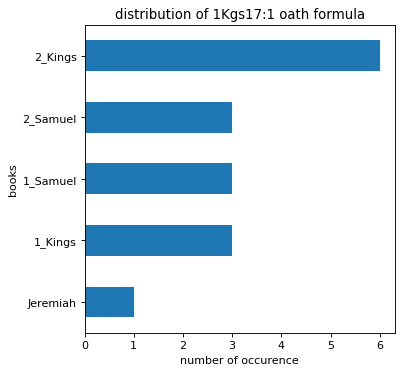

In [57]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
Oath.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('number of occurence')
plt.ylabel('books')
plt.title('distribution of 1Kgs17:1 oath formula')
plt.show()